### Time Series

In [6]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

#### workflow

    1.) Data Cleaning/Transformations/Decomposition 
    2.) EDA/Time Series Visualisation
    3.) Stationarity 
    4.) Feature Engineering 
    5.) Modelling Approaches
    

In [15]:
df = pd.read_csv("airline-passengers.csv")

<Axes: xlabel='Month'>

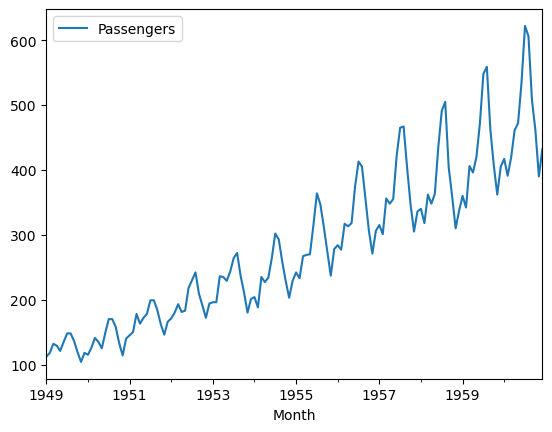

In [16]:
df['Month']=pd.to_datetime(df['Month'])
df.set_index('Month').plot()